In [14]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL

import matplotlib.pyplot as plt
matplotlib.use("Agg")
%matplotlib inline
# used for plot interactive graph. I like it most for plot

C:\Users\Shivu\Anaconda3\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
import seaborn as sns # this is used for the plot the graph
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn import tree

In [3]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
# To import the svm classifier

In [11]:
import random
data = pd.read_csv('pacific.csv')
data.head(100)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,EP011949,UNNAMED,19490612,600,,TS,20.5N,109.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,EP011949,UNNAMED,19490612,1200,,TS,20.6N,110.2W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
7,EP021949,UNNAMED,19490617,1200,,TS,14.1N,107.0W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
8,EP021949,UNNAMED,19490617,1800,,TS,14.6N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
9,EP021949,UNNAMED,19490618,0,,TS,15.0N,108.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
ID                  26137 non-null object
Name                26137 non-null object
Date                26137 non-null int64
Time                26137 non-null int64
Event               26137 non-null object
Status              26137 non-null object
Latitude            26137 non-null object
Longitude           26137 non-null object
Maximum Wind        26137 non-null int64
Minimum Pressure    26137 non-null int64
Low Wind NE         26137 non-null int64
Low Wind SE         26137 non-null int64
Low Wind SW         26137 non-null int64
Low Wind NW         26137 non-null int64
Moderate Wind NE    26137 non-null int64
Moderate Wind SE    26137 non-null int64
Moderate Wind SW    26137 non-null int64
Moderate Wind NW    26137 non-null int64
High Wind NE        26137 non-null int64
High Wind SE        26137 non-null int64
High Wind SW        26137 non-null int64
High Wind NW        2613

In [6]:
#print(data.info())

#data['Status'] = data['Status'].map({'TS':1,'HU':0})

#data.describe() # this will describe the all statistical function of our data

In [12]:
data.Status = pd.Categorical(data.Status)
data['Status'] = data.Status.cat.codes
data.head(100)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,11,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,11,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,11,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,11,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,11,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,EP011949,UNNAMED,19490612,600,,11,20.5N,109.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,EP011949,UNNAMED,19490612,1200,,11,20.6N,110.2W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
7,EP021949,UNNAMED,19490617,1200,,11,14.1N,107.0W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
8,EP021949,UNNAMED,19490617,1800,,11,14.6N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
9,EP021949,UNNAMED,19490618,0,,11,15.0N,108.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


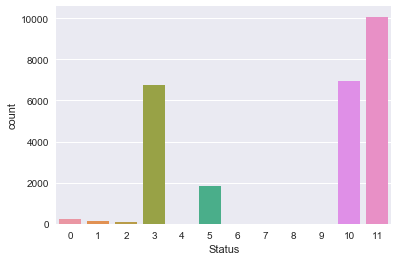

In [15]:
# lets get the frequency of different typhoons
sns.countplot(data['Status'],label="Count")
plt.show()

In [16]:
random.seed(2)
pred_columns = data[:]
pred_columns.drop(['Status'],axis=1,inplace=True)
pred_columns.drop(['Event'],axis=1,inplace=True)
pred_columns.drop(['Latitude'],axis=1,inplace=True)
pred_columns.drop(['Longitude'],axis=1,inplace=True)
pred_columns.drop(['ID'],axis=1,inplace=True)
pred_columns.drop(['Name'],axis=1,inplace=True)
pred_columns.drop(['Date'],axis=1,inplace=True)
pred_columns.drop(['Time'],axis=1,inplace=True)
prediction_var = pred_columns.columns
print(list(prediction_var))

C:\Users\Shivu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Shivu\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shivu\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shivu\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


C:\Users\Shivu\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shivu\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Shivu\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
prediction_var

Index(['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW'],
      dtype='object')

In [10]:
# now these are the variables which will use for prediction
#now split our data into train and test

In [22]:
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(18295, 22)
(7842, 22)


In [23]:
train_X = train[prediction_var]# taking the training data input
train_y= train['Status']# This is output of our training data
#print(list(data.columns))
print(list(train.columns))

['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [24]:
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test['Status']   #output value of test dat

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [25]:
train_X

,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
17404,50,995,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
331,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
13086,30,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
11256,35,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
7988,25,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1910,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
15313,70,986,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5438,40,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2102,25,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
22475,30,1006,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, train_X, train_y, cv=10)
clf.fit(train_X,train_y, sample_weight=None, check_input=True, X_idx_sorted=None)
clf.get_params(deep=True)
clf.predict(test_X, check_input=True)
clf.predict_log_proba(test_X)
clf.predict(test_X,check_input=True)
print(clf.score(test_X,test_y, sample_weight=None))

C:\Users\Shivu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.957281305789


C:\Users\Shivu\Anaconda3\lib\site-packages\sklearn\tree\tree.py:864: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [28]:
clf.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')>

In [43]:
#RandomForest classifier
model=RandomForestClassifier(n_estimators=500,oob_score=True)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
#prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.95753634277


In [44]:
model.oob_score_

0.95660016397922931

In [29]:
#Decision Tree
model = tree.DecisionTreeClassifier()
model.fit(train_X,train_y)# now fit our model for traiing data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs

In [46]:
df=pd.DataFrame(prediction,test_y)
print(df)

         0
Status    
3        3
11      11
10      10
5        5
11      11
11      11
10      10
11      11
10      10
11      11
11      11
11      11
10      10
11      11
11      11
5        5
11      11
3        3
10      10
11      11
3        3
5        5
10      10
3        3
10      10
11      11
10      10
3        3
3        3
11      11
...     ..
3        3
10      10
10      10
10      10
10      10
3        3
11      11
10      10
10      10
3        3
10      10
10       5
11      11
11      11
3        3
10      10
0        5
11      11
11      11
11      11
10      10
5        5
11      11
11      11
10      10
11      11
10      10
3        3
3        3
3        3

[7842 rows x 1 columns]


In [47]:
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.95753634277


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, prediction)

array([[   0,    0,    0,    0,    0,   65,    0,    0,    0,    3,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,   30,    9],
       [   0,    0,    2,    3,    0,    1,    0,    0,    0,   16,   10],
       [   0,    0,    0, 2060,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0],
       [   2,    0,    0,    0,    0,  441,    0,    0,    0,   75,   14],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    1],
       [   0,    0,    1,    0,    0,   98,    0,    0,    0, 2022,    0],
       [   0,    0,    0,    0,    0,    2,    0,    0,    0,    0, 2982]], dtype=int64)